In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#df = pd.read_csv("CP800_initial_IMM_nano_2_ebsd_output.txt",sep='\t')
df = pd.read_csv("CP800_initial_3rd_RD_ND_EP_ebsd_output.txt",sep='\t')

In [3]:
print(df.shape)
print(df['X'].max() *10, df['Y'].max() *10)
df.head(20)

(274999, 10)
499.0 549.0


,X,Y,Phase,Euler_1,Euler_2,Euler_3,grainId_5deg,GrainAverIQ,GOS,KAM
0,0.0,0.0,2,35.4424,39.8160,84.1377,50,171.793,1.21401,0.211825
1,0.1,0.0,2,35.5728,39.9170,83.9942,50,171.793,1.21401,0.121266
2,0.2,0.0,2,35.5728,39.9170,83.9942,50,171.793,1.21401,0.173771
3,0.3,0.0,2,35.7172,40.0082,83.7871,50,171.793,1.21401,0.174090
4,0.4,0.0,2,35.9219,39.9634,83.5319,50,171.793,1.21401,0.156292
5,0.5,0.0,2,36.0948,39.9888,83.4317,50,171.793,1.21401,0.180774
6,0.6,0.0,2,36.0948,39.9888,83.4317,50,171.793,1.21401,0.258827
7,0.7,0.0,2,36.4162,40.0702,83.0903,50,171.793,1.21401,0.332431
8,0.8,0.0,2,36.5809,40.2690,82.8881,50,171.793,1.21401,0.357082
9,0.9,0.0,2,36.9288,40.4713,82.4151,50,171.793,1.21401,0.342560


In [4]:
data_to_show = df[['X', 'Y', 'Phase', 'grainId_5deg']]
print('Phases: ', np.sort(data_to_show['Phase'].unique()))
data_to_show.head(10)

Phases:  [1 2 3]


,X,Y,Phase,grainId_5deg
0,0.0,0.0,2,50
1,0.1,0.0,2,50
2,0.2,0.0,2,50
3,0.3,0.0,2,50
4,0.4,0.0,2,50
5,0.5,0.0,2,50
6,0.6,0.0,2,50
7,0.7,0.0,2,50
8,0.8,0.0,2,50
9,0.9,0.0,2,50


In [5]:
def make_image(x_range, y_range, values):
    image_tab = np.zeros((x_range, y_range))
    
    print(x_range+1, y_range+1)
    
    for x in range(x_range):
        for y in range(y_range):
            image_tab[x][y] = values[x * (x_range-1) + y]
    
    return image_tab

In [6]:
image_matrix = make_image(int(data_to_show['X'].max() *10), int(data_to_show['Y'].max() *10), data_to_show['Phase'].to_numpy())

500 550


In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

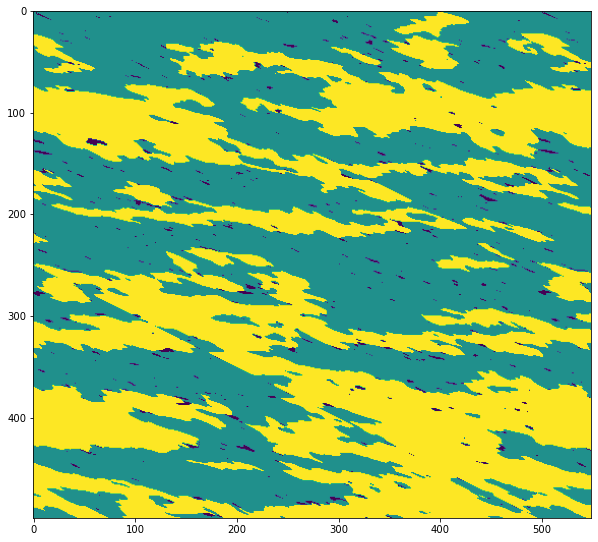

In [8]:
plt.imshow(image_matrix)
plt.show()

In [9]:
def display_grain_on_image(input_tab, grains, grain_number):
    output_tab = np.copy(input_tab)
    
    print(input_tab.shape[0]+1, input_tab.shape[1]+1)
    
    for x in range(input_tab.shape[0]):
        for y in range(input_tab.shape[1]):
            
            if(grains[x * (input_tab.shape[0]-1) + y] == grain_number):
                output_tab[x][y] = 0
    
    return output_tab

In [10]:
grain_image_matrix = display_grain_on_image(image_matrix, data_to_show['grainId_5deg'].to_numpy(), 201)

500 550


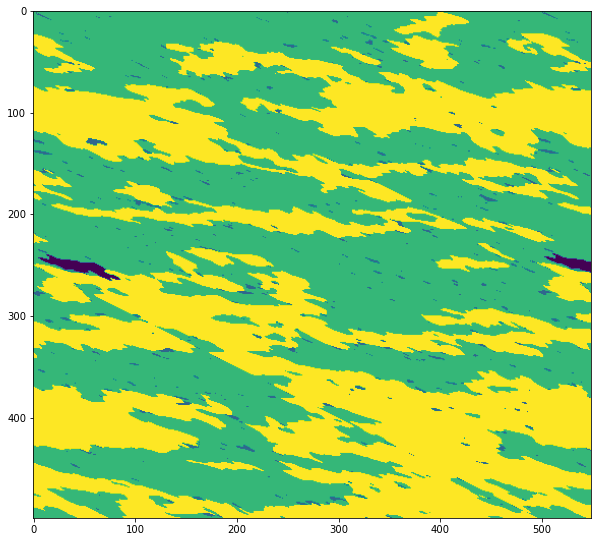

In [11]:
plt.imshow(grain_image_matrix)
plt.show()

In [12]:
def image_binarization_by_grain(x_range, y_range, values, phase):
    image_tab = np.zeros((x_range, y_range))
    
    print(x_range+1, y_range+1)
    
    for x in range(x_range):
        for y in range(y_range):
            if(values[x * (x_range-1) + y] == phase):
                image_tab[x][y] = 1
            else:
                image_tab[x][y] = 0
    
    return image_tab

In [13]:
phase_image_matrix = image_binarization_by_grain(int(data_to_show['X'].max() *10), int(data_to_show['Y'].max() *10), data_to_show['Phase'].to_numpy(), 2)

500 550


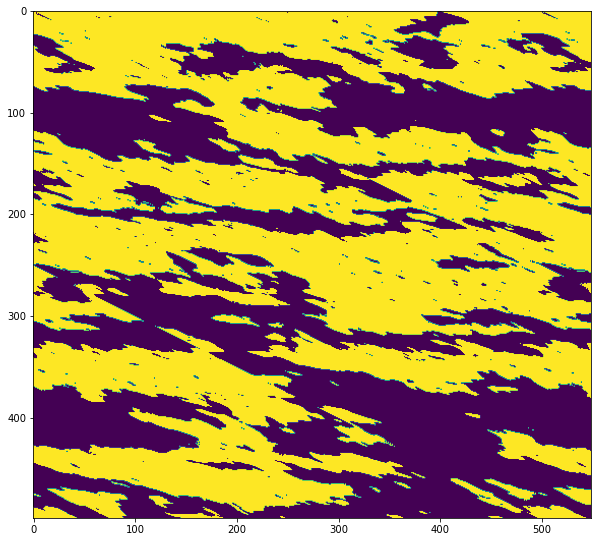

In [14]:
plt.imshow(phase_image_matrix)
plt.show()

In [24]:
def image_color_segmentation(input_tab, grains):
        output_tab = np.copy(input_tab)
        #for i in range((input_tab.shape[0]+1) *(input_tab.shape[1]+1) - grains.shape[0]):
            #grains = np.append(grains, grains[-1])
        
        for x in range(input_tab.shape[0]):
            for y in range(input_tab.shape[1]):
                output_tab[x][y] = np.remainder(grains[x * (input_tab.shape[0]-1) + y], 255)
        
        #grains = np.reshape(grains, (input_tab.shape[0]+1, input_tab.shape[1]+1))
        
        return output_tab / 255. #np.mod(grains, 255)/ 255.

In [39]:
image_matrix_segmentation = image_color_segmentation(image_matrix, data_to_show['grainId_5deg'].to_numpy())
image_matrix_segmentation = np.uint8(cm.gist_rainbow(image_matrix_segmentation) *255)

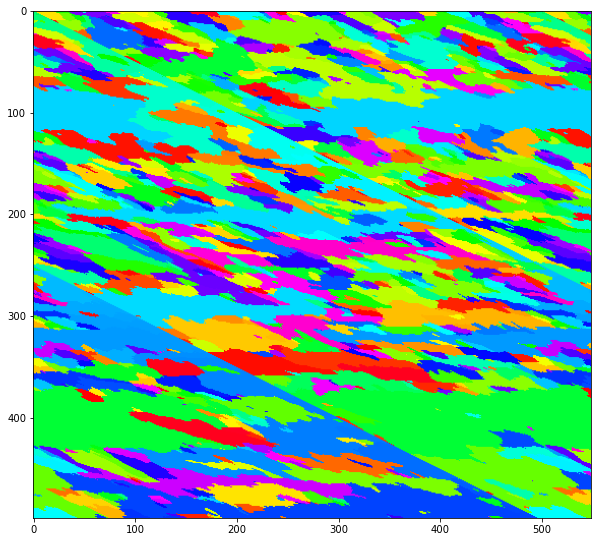

In [40]:
plt.imshow(image_matrix_segmentation)
plt.show()